<font color='Orange'><h1>Technolab Internship Mini Project - Classfication of Song Genres</h1></font>
<font color='Green' ><h3>By Tripura Rajavarapu </h4></font>



### Problem Statement
<p style="font-family: Arial; font-size:1.0em;">Over the past few years, streaming services with huge catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.
For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.
To begin with, let's load the metadata about our tracks alongside the track metrics compiled by The Echo Nest. A song is about more than its title, artist, and number of listens. We have another dataset that has musical features of each track such as danceability and acousticness on a scale from -1 to 1. These exist in two different files, which are in different formats - CSV and JSON. While CSV is a popular file format for denoting tabular data, JSON is another common file format in which databases often return the results of a given query.

In [1]:
! pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
#Importing the libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset

tracks=pd.read_csv('fma-rock-vs-hiphop.csv')

In [4]:
#Lets check the head of the dataset
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [5]:
#Info of the dataset
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [6]:
echonest_metrics = pd.read_json('echonest-metrics.json',
                               precise_float = True)

In [7]:
#look at the head of echonest_metrics
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [8]:
#info of the dataset
echonest_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [9]:
# Merge the track_id and genre_top columns of tracks and echonest_metrics on track_id values
echo_tracks = pd.merge(left = tracks[['track_id', 'genre_top']], right=echonest_metrics, on='track_id')

echo_tracks.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [10]:
#Info of the merged dataset
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


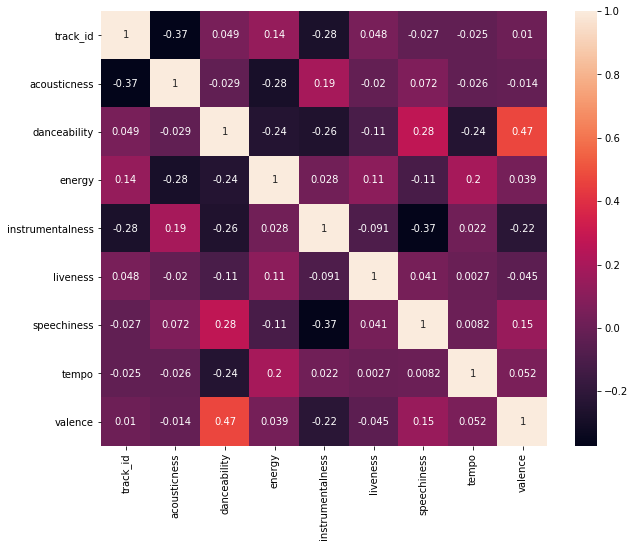

In [11]:
#Lets check the correaltion between the features
plt.figure(figsize=[10,8])
sns.heatmap(echo_tracks.corr(),annot=True)
plt.show()

`We could see some correlation between danceability and valence but it is not strong enough`

In [12]:
#Let us now normalize the data features 
X = echo_tracks.drop(['genre_top', 'track_id'], axis = 1)

# Define our labels
y = echo_tracks['genre_top']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [13]:
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

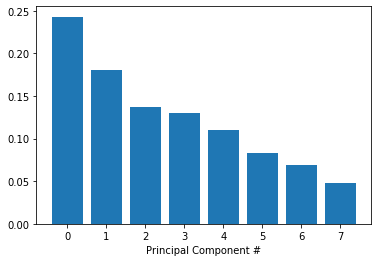

In [14]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')
plt.show()

In [15]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

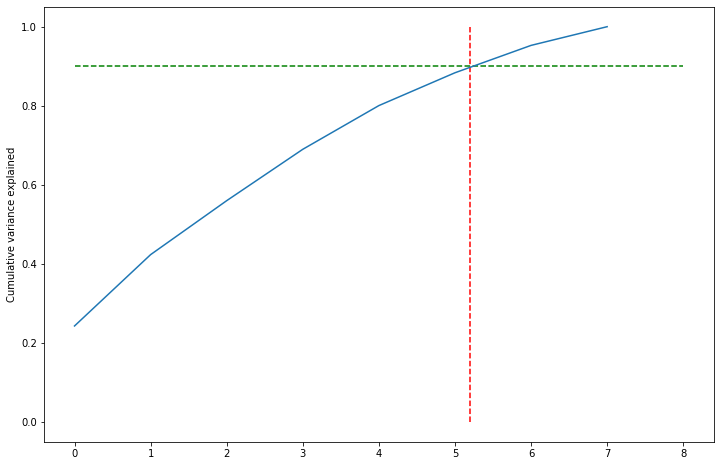

In [16]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.
# fig, ax = plt.subplots()
# ax.plot(range(8),cum_exp_variance)
# ax.axhline(y=0.9, linestyle='--')
# plt.show()


fig = plt.figure(figsize=[12,8])
plt.vlines(x=5.2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=8, xmin=0, colors="g", linestyles="--")
plt.plot(cum_exp_variance)
plt.ylabel("Cumulative variance explained")
plt.show()

In [17]:
n_components = 8

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [18]:
pca_projection.shape

(4802, 8)

## Train-test Split

In [19]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(pca_projection, y, stratify = y)

# Train our decision tree
dt = DecisionTreeClassifier(random_state = 10)
dt.fit(X_train, y_train)

# Predict the labels for the test data
pred_labels_tree = dt.predict(X_test)

In [20]:
accuracy_score(y_test, pred_labels_tree)

0.8609492089925063

In [21]:
y.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

#### Our data is imbalanced so, accuracy score is not a good metric. Lets calculate using confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_labels_tree)

array([[139,  89],
       [ 78, 895]], dtype=int64)

In [23]:
# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(X_train, y_train)
pred_labels_logit = logreg.predict(X_test)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, pred_labels_tree)
class_rep_log = classification_report(y_test, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.64      0.61      0.62       228
        Rock       0.91      0.92      0.91       973

    accuracy                           0.86      1201
   macro avg       0.78      0.76      0.77      1201
weighted avg       0.86      0.86      0.86      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.81      0.59      0.68       228
        Rock       0.91      0.97      0.94       973

    accuracy                           0.90      1201
   macro avg       0.86      0.78      0.81      1201
weighted avg       0.89      0.90      0.89      1201



### lets balance the target column

In [24]:
# Subset only the hip-hop tracks, and then only the rock tracks
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']
rock_only.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [25]:
rock_only.shape, hop_only.shape

((3892, 10), (910, 10))

### SMOTE method to balance the data

In [26]:
## SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, classification_report 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [27]:
#performing Logistic regression on balanced data
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print("Train Accuracy:")
print(classification_report(y_train, lr1.predict(X_train))) 
print("Test Accuracy:")
print(classification_report(y_test, predictions)) 

Train Accuracy:
              precision    recall  f1-score   support

     Hip-Hop       0.60      0.83      0.70       682
        Rock       0.96      0.87      0.91      2919

    accuracy                           0.86      3601
   macro avg       0.78      0.85      0.80      3601
weighted avg       0.89      0.86      0.87      3601

Test Accuracy:
              precision    recall  f1-score   support

     Hip-Hop       0.61      0.83      0.71       228
        Rock       0.96      0.88      0.92       973

    accuracy                           0.87      1201
   macro avg       0.79      0.86      0.81      1201
weighted avg       0.89      0.87      0.88      1201



### Generate Pickle File

In [28]:
import pickle
# Saving model to disk
pickle.dump(lr1, open('Classifier.pkl','wb'))

# Loading model to compare the results
pickle.load(open('Classifier.pkl','rb'))

LogisticRegression()